# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Изучение общей информации

In [3]:
import pandas as pd #импротируем библиотеку pandas

In [4]:
#загружаем данные объявлений о продаже квартир
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [5]:
#выводим первые пять строк датасета
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [6]:
#выводим интформацию о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'cityCenters_nearest'}>],
       [<Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

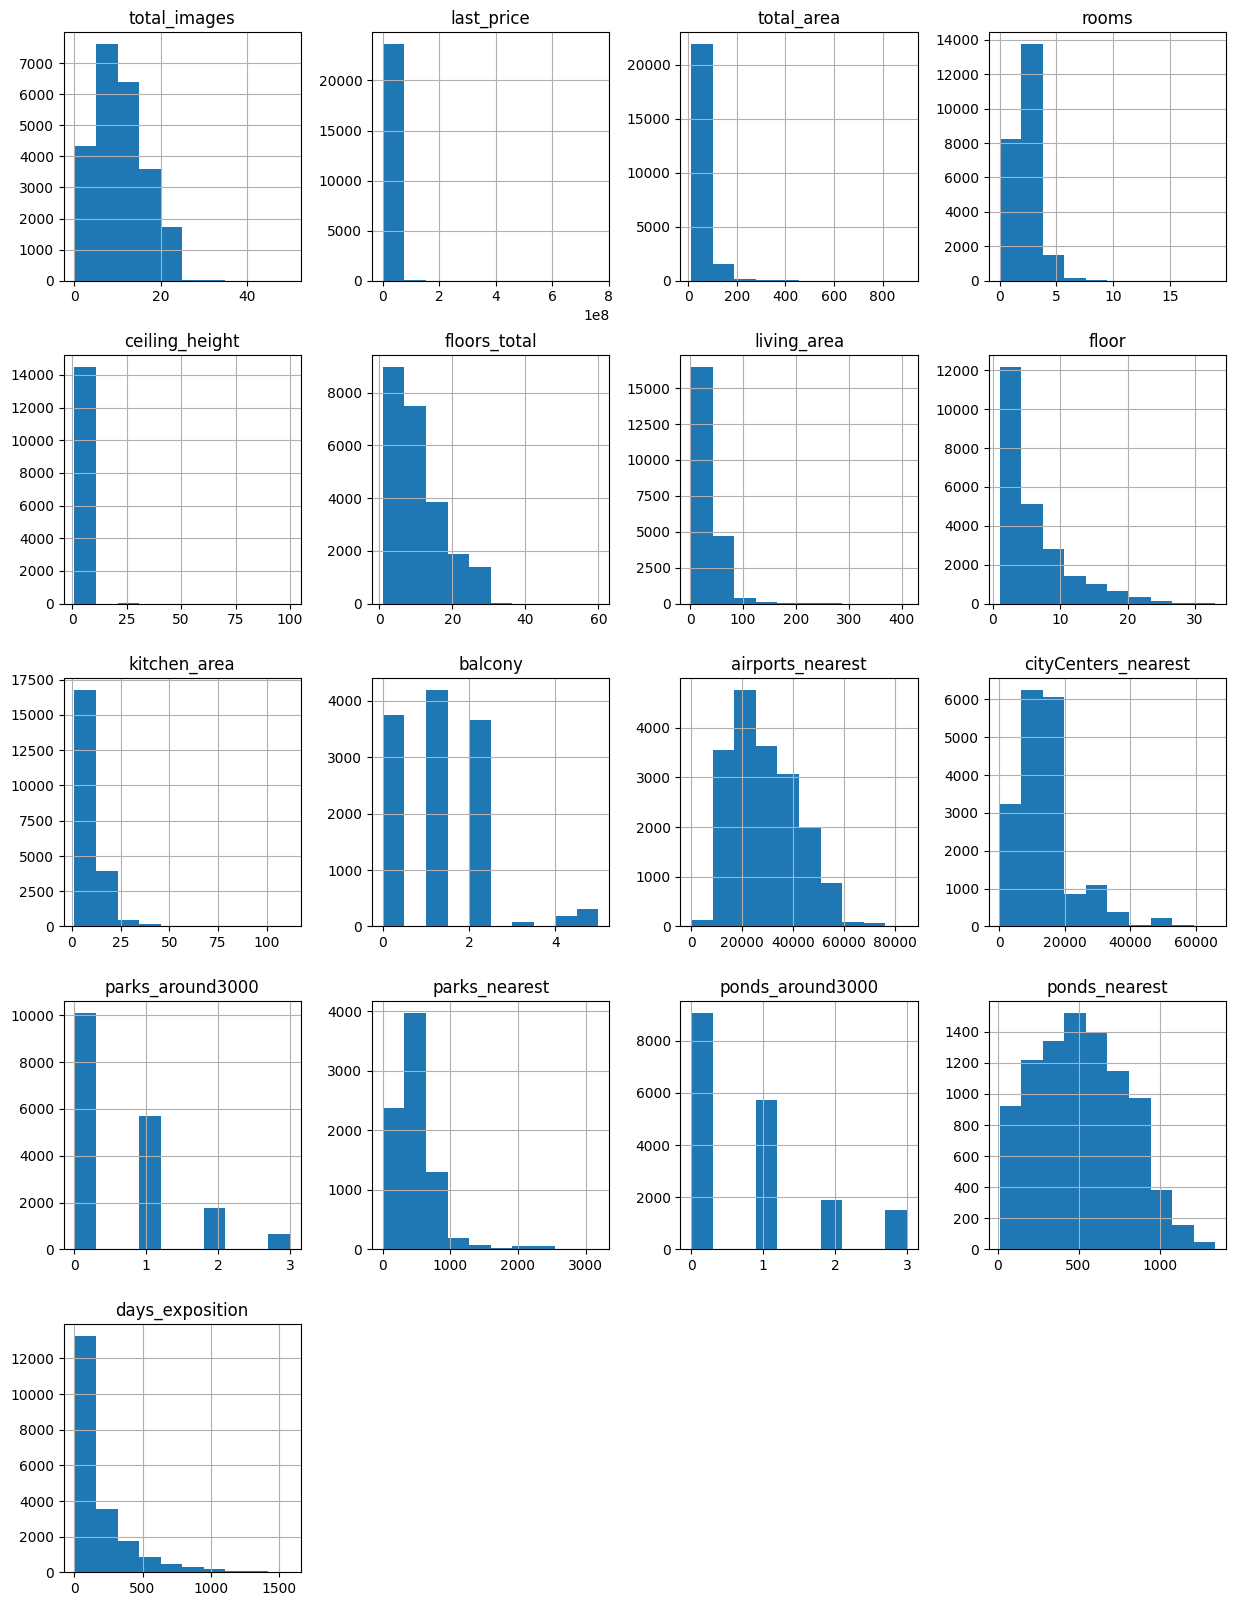

In [7]:
#строим гистограммы по всем числовым столбцам
data.hist(figsize=(15, 20))

Вывод: в данных имеется 23699 записей, в ряде столбцов есть пропущенные данные. По гистограммам видно, что в данных есть аномальные значения.

### Предобработка данных

In [8]:
#сумма пропущенных значений
data.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

Заполняем пропуски:
1. ceiling_height - высота потолков. Заполним проски медианным значением, так как ее вероятнее всего забыли указать.
2. floors_total - всего этажей в доме. Заполним проски медианным значением, так как ее вероятнее всего забыли указать.
3. living_area - жилая площадь. Оставим без изменений, жилая площадь = общая площадь - нежилая площадь.
4. is_apartment - аппартаменты. Среднее значение примерно 2%, следовательно при заполнении их не указали. Заполним значением False.
5. kitchen_area - площадь кухни. Явной зависимости от других данных нет, вероятнее собственний не указал площадь кухни из-за её отсутствия. Заполним знасением 0.
6. balcony - число балконов. Вероятнее всего, где не указано количество балконов, в этой квартире их нет. Заполняем прропуски 0.
7. locality_name - название населенного пункта. Заменим пропуски на "unknown".
8. airports_nearest - расстояние до ближайшего аэропорта. Возможно аэропорт находится на большом расстоянии, поэтому его не указали, оставим значения без изменений.
9. cityCenters_nearest - расстояние до центра города. Значение могли не указать, потому что объект продажи находится не в городе.
10. parks_around3000 - число парков в радиусе 3 км. Пропуски могут указывать на то, что в радиусе 3 км нет парков. заполним значением 0.
11. parks_nearest - расстояние до ближайшего парка. Возможно парк находится на большом расстоянии, поэтому его не указали, оставим значения без изменений.
12. ponds_around3000 - число водоёмов в радиусе 3 км. Пропуски могут указывать на то, что в радиусе 3 км нет водоёмов. заполним значением 0.
13. ponds_nearest - расстояние до ближайшего водоёма. Возможно водоём находится на большом расстоянии, поэтому его не указали, оставим значения без изменений.
14. days_exposition - сколько дней было размещено объявление (от публикации до снятия). Пропуски могут указывать на то, что объект еще не продан, оставим значения без изменений.

In [9]:
data['is_apartment'].mean()

0.018018018018018018

In [10]:
#заполняем пропуски
#высоту потолков заполняем медианным значением
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
#этажность дома заполняем медианным значением
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())
#столбец аппартаменты заполним False и изменим тип на bool
data['is_apartment'] = data['is_apartment'].fillna(False).astype('bool')
#число балконов заполняем 0 и изменим тип данных на int
data['balcony'] = data['balcony'].fillna(0).astype('int')
#значение столбца с названием населенного пункта заменим на "unknown"
data['locality_name'] = data['locality_name'].fillna('unknown')
#число парков в радиусе 3 км заполняем 0 и изменим тип данных на int
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int')
#число водоёмов в радиусе 3 км заполняем 0 и изменим тип данных на int
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int')

In [11]:
#создаем словарь для удобного доступа
living = data.groupby('rooms')['living_area'].agg('median').round(2).to_dict() 

# Создаем функцию для заполнения пропущенных значений
def fill_living_area(row):
    rooms = row['rooms']
    if pd.isna(row['living_area']):
        return living.get(rooms) #Обращаемся к словарю по ключу (количество комнат)
    else:
        return row['living_area']

# применяем функцию для заполнения пропущенных значений
data['living_area'] = data.apply(fill_living_area, axis=1)

In [12]:
#заполним значения площали кухни медианным значением исходя из количества комнат
#kitchen = dict(data.groupby('rooms')['kitchen_area'].agg('median').round(2))
#data['kitchen_area'] = data['kitchen_area'].fillna(data['rooms'].map(kitchen))
data['kitchen_area'] = data['kitchen_area'].fillna(0)

Вывод: заполнение площади кухни на медианное значение по количеству комнат не подходит, потому что сумма жилой площади и площади кухни в 4273 строках превышает общую площадь.

In [13]:
data['area'] = data['total_area'] >= data['living_area'] + data['kitchen_area']
data['area'].value_counts()

True     23598
False      101
Name: area, dtype: int64

In [14]:
# Создаем функцию для замены значений жилой площади квартиры в строках, где сумма жилой площади и площади кухни превышаю общую
def living_area(row):
    if row['area'] == False:
        return row['total_area'] - row['kitchen_area']
    else:
        return row['living_area']
    
data['living_area'] = data.apply(living_area, axis=1)

In [15]:
data['area'] = data['total_area'] >= data['living_area'] + data['kitchen_area']
data['area'].value_counts()

True     23698
False        1
Name: area, dtype: int64

In [16]:
data[~data['area']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area
551,8,3100000.0,31.59,2018-03-08T00:00:00,1,2.7,19.0,22.31,2,False,...,2,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,70.0,False


In [17]:
data.loc[551]

total_images                              8
last_price                        3100000.0
total_area                            31.59
first_day_exposition    2018-03-08T00:00:00
rooms                                     1
ceiling_height                          2.7
floors_total                           19.0
living_area                           22.31
floor                                     2
is_apartment                          False
studio                                False
open_plan                             False
kitchen_area                           9.28
balcony                                   2
locality_name                посёлок Мурино
airports_nearest                        NaN
cityCenters_nearest                     NaN
parks_around3000                          0
parks_nearest                           NaN
ponds_around3000                          0
ponds_nearest                           NaN
days_exposition                        70.0
area                            

Вывод: заполнили пропущенные значения в стоблце жилой площади медианной площадью по количеству комнат, строки, в которых не выполнялось условие data['total_area'] >= data['living_area'] + data['kitchen_area'], заменили значения.

In [18]:
#заменим тип данных в столбце first_day_exposition с object на datetime, так как время точно не указано, оставим только дату
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
#переименуем столбец cityCenters_nearest
data.rename(columns = {'cityCenters_nearest': 'city_centers_nearest'}, inplace=True)

In [19]:
#проверим датасет на явные дубликаты
data.duplicated().sum()

0

In [20]:
#выводим уникальные значения столбцца с названиями населенных пунктов
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [21]:
#заменяем букву "ё" на "е", оставляем только названия населенных пунктов
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок ', 'городской ', 'деревня ', 'городского типа ', 'садовое товарищество ', 'село ', 'станции ', 'садоводческое некоммерческое товарищество ', 'Платформа ', 'при железнодорожной ', 'коттеджный '], '', regex=True)
) 

In [22]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

Основные причины пропусков:
1. Человеческий фактор.
2. Возможны программные сбои.
3. Возможно во время работы добавлялись данные, ранее введенные данные не откорректировали.

В процессе продобработки данных:
1. Были заполнены явные пропуски
2. в столбцах balcony, parks_around3000, ponds_around3000 был изменен тип данных на целочисленный. В столбце first_day_exposition тип данных изменен на datetime.
3. Проверили данные на явные дубликаты.
4. В столбце locality_name устранены неявные дубликаты.

### Добавление в таблицу новых столбцов

In [24]:
#создаем столбец с данными о цене одного квадратного метра
data['price_square_meter'] = (data['last_price'] / data['total_area']).round(2)
data['price_square_meter'].unique()

array([120370.37,  82920.79,  92785.71, ...,  44091.71, 149511.4 ,
        41795.67])

In [25]:
#создаем столбец с днем недели публикации объявления
data['day_publication'] = data['first_day_exposition'].dt.weekday
data['day_publication'].unique()

array([3, 1, 4, 0, 2, 6, 5], dtype=int64)

In [26]:
#создаем столбец с месяцем публикации объявления
data['month_publication'] = data['first_day_exposition'].dt.month
data['month_publication'].unique()

array([ 3, 12,  8,  7,  6,  9, 11,  4,  5,  2,  1, 10], dtype=int64)

In [27]:
#создаем столбец с месяцем публикации объявления
data['year_publication'] = data['first_day_exposition'].dt.year
data['year_publication'].unique()

array([2019, 2018, 2015, 2017, 2016, 2014], dtype=int64)

In [28]:
#создаем столбец с типом этажа публикации объявления
def floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'поледний'
    else:
        return 'другой'

data['type_floor'] = data.apply(floor, axis=1)
data['type_floor'].unique()

array(['другой', 'первый', 'поледний'], dtype=object)

In [29]:
#создаем столбец с расстоянием до центра города в километрах
data['distance_city_center'] = (data['city_centers_nearest'] / 1000).round(0)
data['distance_city_center'].unique()

array([16., 19., 14.,  7.,  8., nan, 12., 15., 52., 33., 31., 11., 13.,
       10.,  2., 32.,  4., 17., 30.,  5., 51., 50., 24., 18.,  9., 28.,
        3.,  6., 27., 21., 49., 35., 36., 34.,  1., 29., 26., 53., 22.,
       55., 20., 23., 25.,  0., 66., 47., 40., 57., 37., 41., 43., 48.,
       62., 60., 39., 42., 65., 54., 59., 45., 61., 63.])

### Исследовательский анализ данных

#### Анализ по параметрам

##### Анализ общей площади 

In [30]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [31]:
#выведем общую площадь по количеству квратир в продаже 
data['total_area'].value_counts().head()

45.0    419
42.0    383
60.0    347
31.0    346
44.0    345
Name: total_area, dtype: int64

<Axes: ylabel='Frequency'>

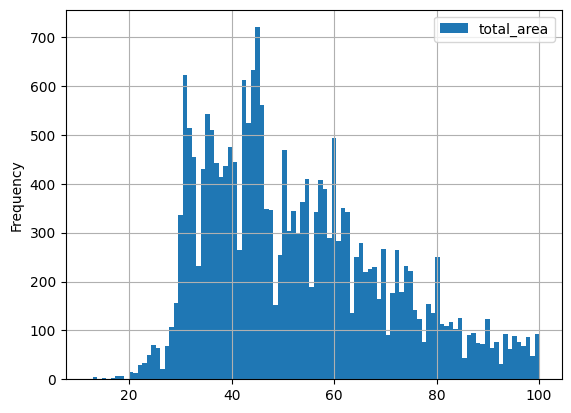

In [32]:
#построим гистограмму, оставим значения от минимального 12 до 200 
data.plot(y='total_area', kind='hist', bins=100, range = (12,100), grid=True)

Вывод: большое количество квартир с площадью от 30 до 69 кв.м с максимумом 45 кв.м и средней площадью 52 кв. м.

##### Анализ жилой площади

In [33]:
data['living_area'].describe()

count    23699.000000
mean        34.291407
std         21.681085
min          2.000000
25%         18.400000
50%         30.300000
75%         42.700000
max        409.700000
Name: living_area, dtype: float64

<Axes: ylabel='Frequency'>

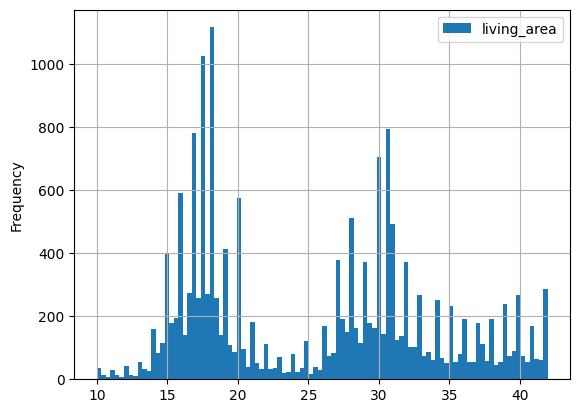

In [34]:
#построим гистограмму, оставим значения от 10 до 42
data.plot(y='living_area', kind='hist', bins=100, range = (10, 42), grid=True)

Вывод: больше всего продают квартир с жилой площадью 18 кв.м, наблюдается спад предложений с жилой площадью 23 кв.м, также наблюдается пик на площади 30 кв.м, это модет указывать на то, что средняя жилая площадь однокомнатных квартир - 18 кв. м, а двухкомнатных - 30 кв. м. 

##### Анализ площади кухни

In [35]:
data['kitchen_area'].describe()

count    23699.000000
mean         9.553814
std          6.420973
min          0.000000
25%          6.300000
50%          9.000000
75%         11.440000
max        112.000000
Name: kitchen_area, dtype: float64

<Axes: ylabel='Frequency'>

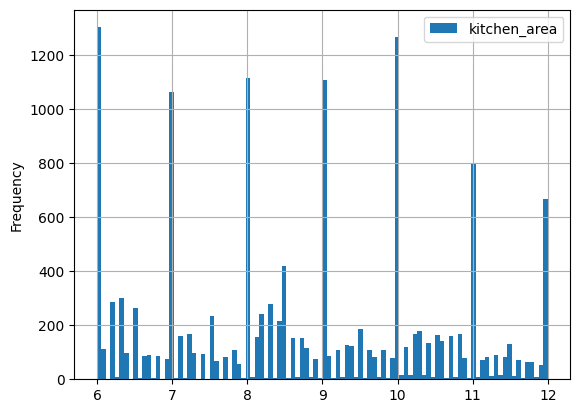

In [36]:
#построим гистограмму, оставим значения от 6 до 12
data.plot(y='kitchen_area', kind='hist', bins=100, range = (6, 12), grid=True)

Вывод: наибольшее количество квартир с площадью кухни 6 кв.м, затем 10 кв.м. Прослеживается, что в анкетах указывали целое число площади.

##### Анализ цены объекта

In [37]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<Axes: ylabel='Frequency'>

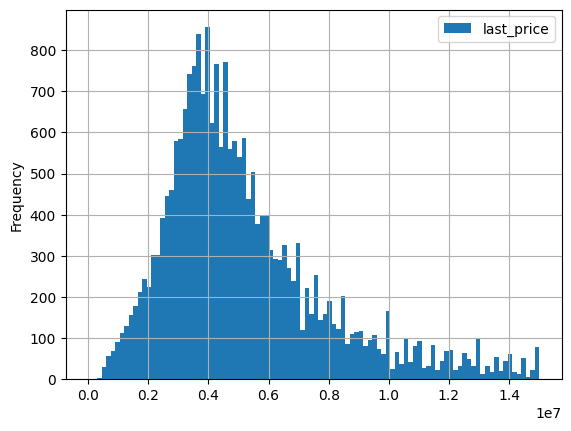

In [38]:
#построим гистограмму, оставим значения от 0 до 15 млн
data.plot(y='last_price', kind='hist', bins=100, range = (0,15000000), grid=True)

Вывод: наибольшее количество квартир находится в ценовом диапазоне 3,4-4,2 млн. Распределение Гаусса.

##### Анализ количества комнат

In [39]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<Axes: ylabel='Frequency'>

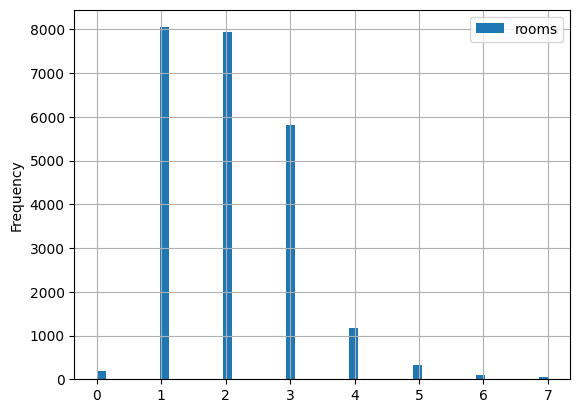

In [40]:
#построим гистограмму, оставим значения от 0 до 7
data.plot(y='rooms', kind='hist', bins=50, range=(0, 7), grid=True)

Вывод: наибольшее количество квартир имеют одну комнату, с увеличением количества комнат уменьшается количество предложений.

##### Анализ высоты потолков

In [41]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

<Axes: ylabel='Frequency'>

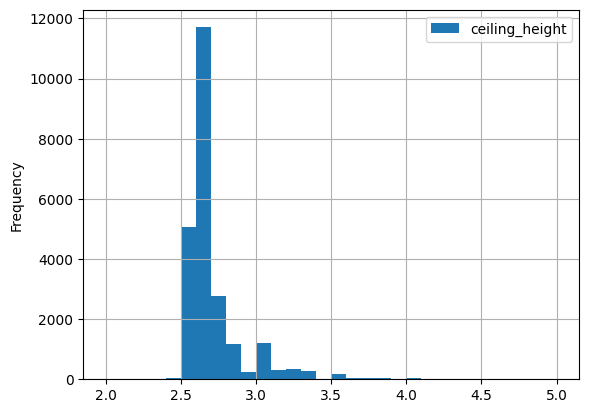

In [42]:
#построим гистограмму, оставим значения от 2 до 5
data.plot(y='ceiling_height', kind='hist', bins=30, range=(2, 5), grid=True)

Вывод: наибольшее количество квартир имеют высоту потолков 2,65 м.

##### Анализ типа этажа квартиры

In [43]:
data['type_floor'].describe()

count      23699
unique         3
top       другой
freq       17441
Name: type_floor, dtype: object

<Axes: ylabel='floor'>

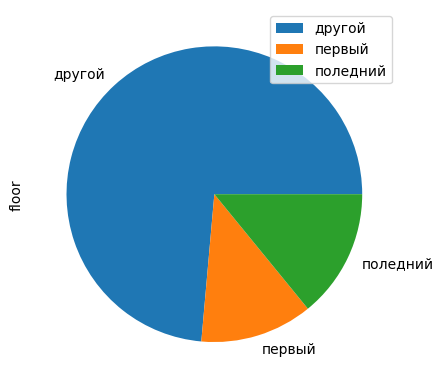

In [44]:
#построим гистограмму, оставим значения от 2 до 6
(data
    .pivot_table(values='floor', index='type_floor', aggfunc='count')
    .plot(y='floor', kind='pie')
)

Вывод: по диаграмме видно, что наибольше количество квартир находятся не на первом и не последнем этаже. Количество квартир на первом и последнем этажах составляет чуть больше 25%.

##### Анализ общего количества этажей в доме

In [45]:
data['floors_total'].describe()

count    23699.000000
mean        10.667750
std          6.585961
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<Axes: ylabel='Frequency'>

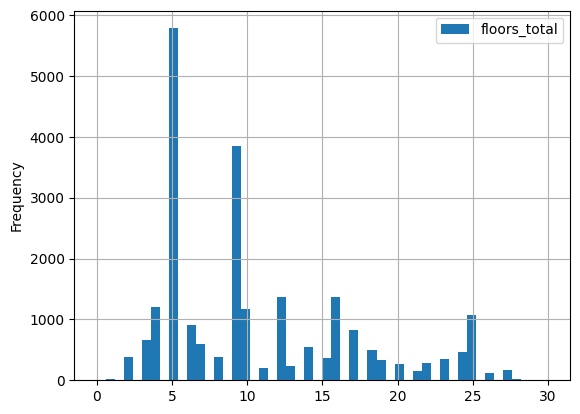

In [46]:
#построим гистограмму, оставим значения от 0 до 30
data.plot(y='floors_total', kind='hist', bins=50, range=(0, 30), grid=True)

Вывод: больше всего предложений по продаже квартир в пятиэтажных домах.

##### Анализ расстояния до центра города в метрах

In [47]:
data['city_centers_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

<Axes: ylabel='Frequency'>

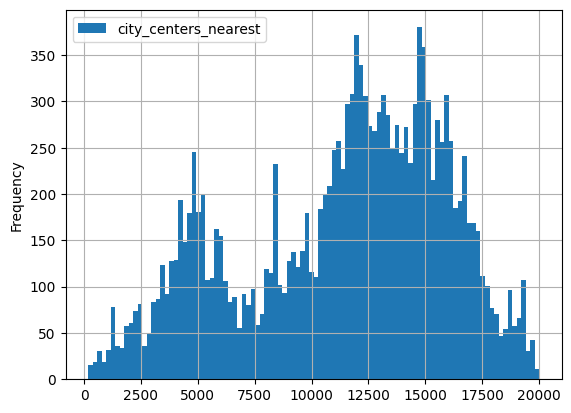

In [48]:
#построим гистограмму, оставим значения от 180 до 20000
data.plot(y='city_centers_nearest', kind='hist', bins=100, range=(180, 20000), grid=True)

Вывод: больше всего предложений по продаже квартир вдалеке от центра города (12-15 км), наблюдается еще один пик на расстоянии 5 км от центра города.

##### Анализ расстояния до ближайшего парка

In [49]:
data['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<Axes: ylabel='Frequency'>

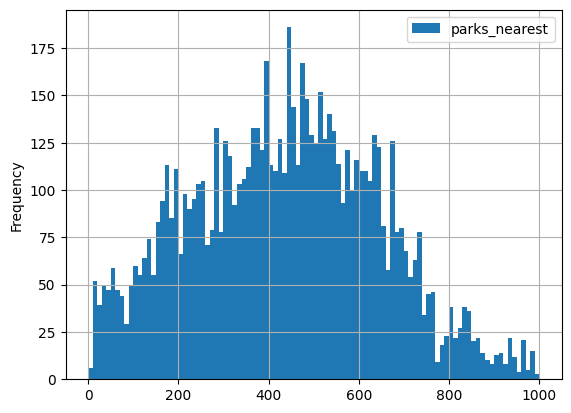

In [50]:
#построим гистограмму, оставим значения от 0 до 1000
data.plot(y='parks_nearest', kind='hist', bins=100, range=(0, 1000), grid=True)

Вывод: количество предложений не сильно зависит от расстояния до ближайшего парка. Среднее расстояние до парка 200-700 метров.

#### Изучаем, как быстро продавались квартиры

In [51]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<Axes: ylabel='Frequency'>

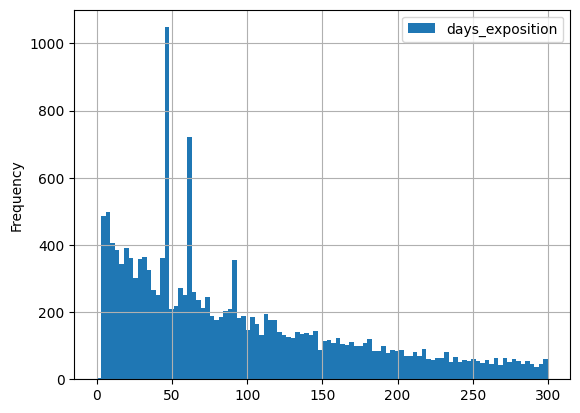

In [52]:
#построим гистограмму, оставим значения от 0 до 300
data.plot(y='days_exposition', kind='hist', bins=100, range=(0, 300), grid=True)

Вывод: среднее значение по времени продажи квартиры - 180 дней, медианное - 95 дней. В среднем продажа занимает 2-3 месяца. Быстрыми продажами можно считать продажи за 45 дней (1 квартиль), долгими - больше 232 дней (3 квартиль)

#### Факторы, которые больше всего влияют на общую (полную) стоимость объекта

In [53]:
data_corr = data.pivot_table(index='floor', values=['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'day_publication', 'month_publication', 'year_publication']).corr()
data_corr

,day_publication,kitchen_area,last_price,living_area,month_publication,rooms,total_area,year_publication
day_publication,1.000000,0.551975,0.323738,0.086971,0.269221,-0.059111,0.320962,0.181063
kitchen_area,0.551975,1.000000,0.284824,0.150583,-0.009482,0.177180,0.454583,-0.254011
last_price,0.323738,0.284824,1.000000,0.618262,-0.019113,0.442449,0.738972,-0.052080
living_area,0.086971,0.150583,0.618262,1.000000,-0.155820,0.901987,0.922504,-0.054351
month_publication,0.269221,-0.009482,-0.019113,-0.155820,1.000000,-0.289615,-0.056876,-0.355876
rooms,-0.059111,0.177180,0.442449,0.901987,-0.289615,1.000000,0.811538,-0.046553
total_area,0.320962,0.454583,0.738972,0.922504,-0.056876,0.811538,1.000000,-0.091682
year_publication,0.181063,-0.254011,-0.052080,-0.054351,-0.355876,-0.046553,-0.091682,1.000000


0.6536750579657239


c:\Users\aandr\miniconda3\envs\practicum\lib\site-packages\pandas\plotting\_matplotlib\core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='total_area', ylabel='last_price'>

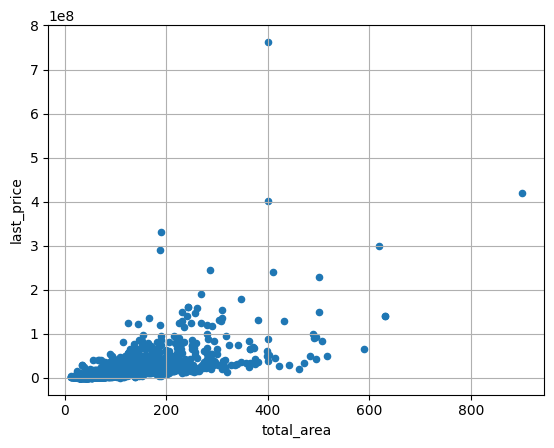

In [54]:
print(data['total_area'].corr(data['last_price']))
data.plot(x='total_area', y='last_price', kind='scatter', grid=True)

0.5567159903291815


<Axes: xlabel='living_area', ylabel='last_price'>

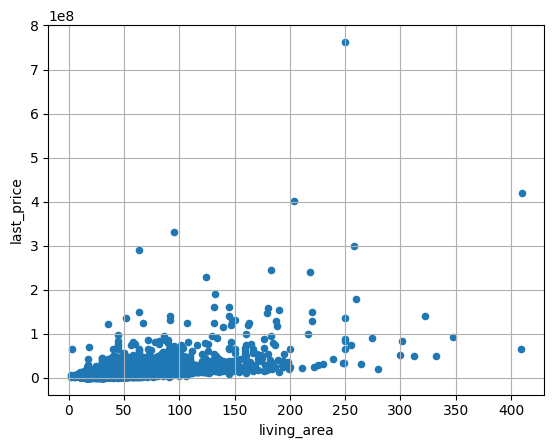

In [55]:
print(data['living_area'].corr(data['last_price']))
data.plot(x='living_area', y='last_price', kind='scatter', grid=True)

0.38644378419384234


<Axes: xlabel='kitchen_area', ylabel='last_price'>

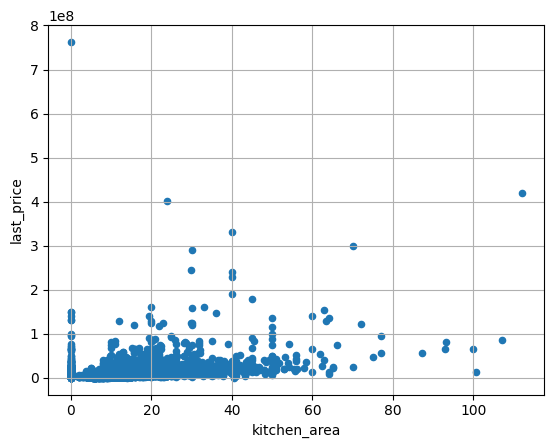

In [56]:
print(data['kitchen_area'].corr(data['last_price']))
data.plot(x='kitchen_area', y='last_price', kind='scatter', grid=True)

<Axes: xlabel='rooms'>

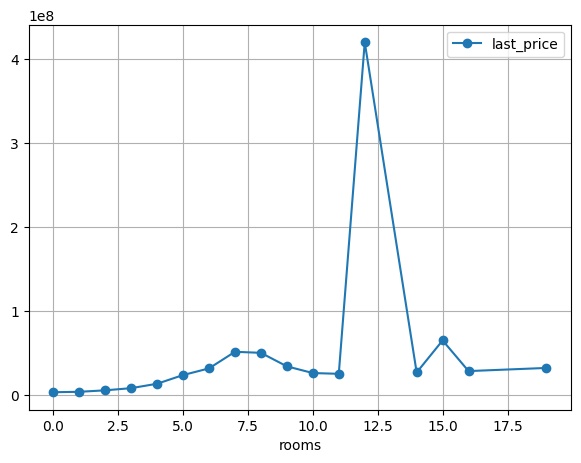

In [57]:
(data
    .pivot_table(index='rooms', values='last_price')
    .plot(style='o-', grid=True, figsize=(7, 5))
)

<Axes: xlabel='type_floor'>

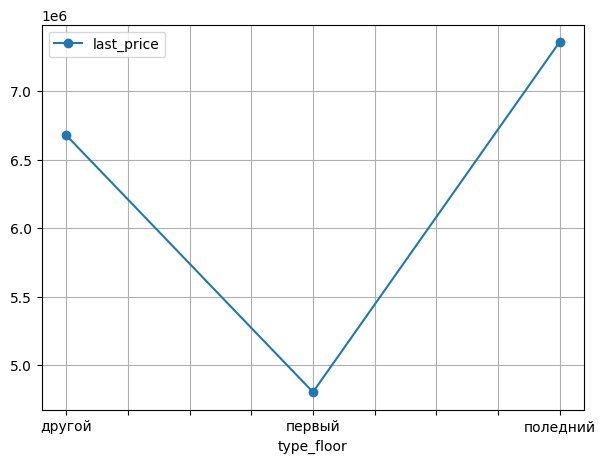

In [58]:
(data
    .pivot_table(index='type_floor', values='last_price')
    .plot(style='o-', grid=True, figsize=(7, 5))
)

<Axes: xlabel='day_publication'>

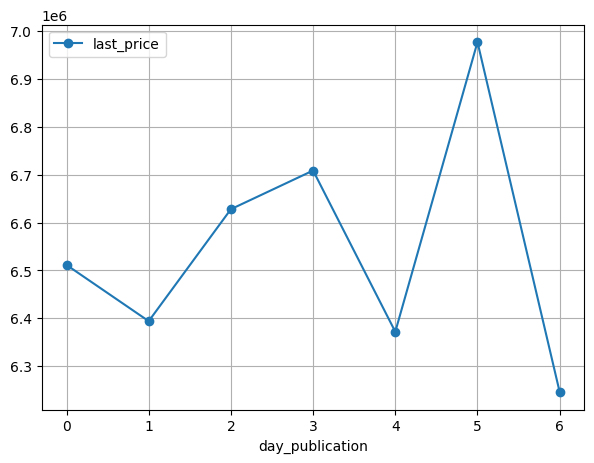

In [59]:
(data
    .pivot_table(index='day_publication', values='last_price')
    .plot(style='o-', grid=True, figsize=(7, 5))
)

<Axes: xlabel='month_publication'>

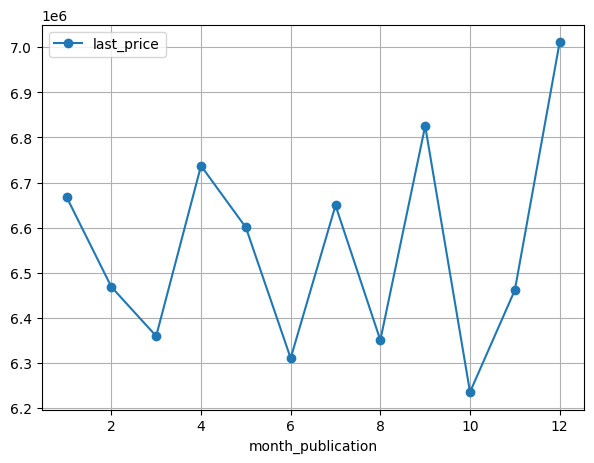

In [60]:
(data
    .pivot_table(index='month_publication', values='last_price')
    .plot(style='o-', grid=True, figsize=(7, 5))
)

<Axes: xlabel='year_publication'>

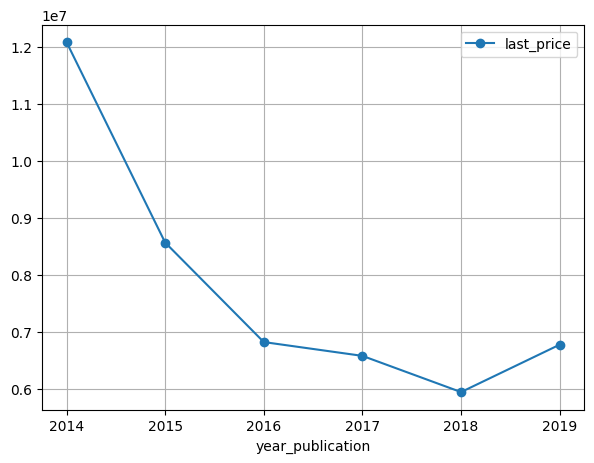

In [61]:
(data
    .pivot_table(index='year_publication', values='last_price')
    .plot(style='o-', grid=True, figsize=(7, 5))
)

Вывод:
1. Наибольшую корреляцию имеет общая площадь квартиры (~0,74). Чем больше общая площадь, тем больше стоимость квартиры.
2. Корреляция между жилой площадью и стоимостью немного меньше, чем с общей площадью (0,65).
3. Слабая зависимость между ценой и днем публикации, площадью кухни, количеством комнат.
3. Нет зависимости между ценой и месяцем публикации, годом публикации

#### Средняя цена кв.м в 10 населённых пунктах

In [62]:
price_sqr_meter = data.pivot_table(index='locality_name', values='last_price', aggfunc=['count'])
price_sqr_meter.columns = ['count']
price_sqr_meter = price_sqr_meter.sort_values(by='count', ascending=False).head(10)
price_sqr_meter['price_square_meter'] = data.pivot_table(index='locality_name', values='price_square_meter').round(2)
price_sqr_meter = price_sqr_meter.sort_values(by='price_square_meter', ascending=False)
price_sqr_meter.head(10)

,count,price_square_meter
locality_name,,
Санкт-Петербург,15721,114849.01
Пушкин,369,103125.82
Кудрово,472,95324.93
Парголово,327,90175.91
Мурино,590,86087.51
Шушары,440,78677.36
Колпино,338,75424.58
Гатчина,307,68746.15
Всеволожск,398,68654.47


Вывод: самая высокая стоимость квадратного метра в Санкт-Петербурге, самая низкая стоимость квадратного метра из этих десяти населенных пунтов в Выборге.

#### Средняя стоимость квартир в Санкт-Петербурге на разном удаленни от центра

In [63]:
data['distance_city_center'] = data['distance_city_center'].fillna(1000).astype('int')
city_center = (
    data
    .query('locality_name == "Санкт-Петербург" and distance_city_center != 1000')
    .pivot_table(index='distance_city_center', values='last_price', aggfunc=['mean'])
)
city_center

,mean
,last_price
distance_city_center,
0,3.144912e+07
1,2.120672e+07
2,1.778832e+07
3,1.112658e+07
4,1.330428e+07
5,1.449912e+07
6,1.533842e+07
7,1.477515e+07


<Axes: xlabel='distance_city_center'>

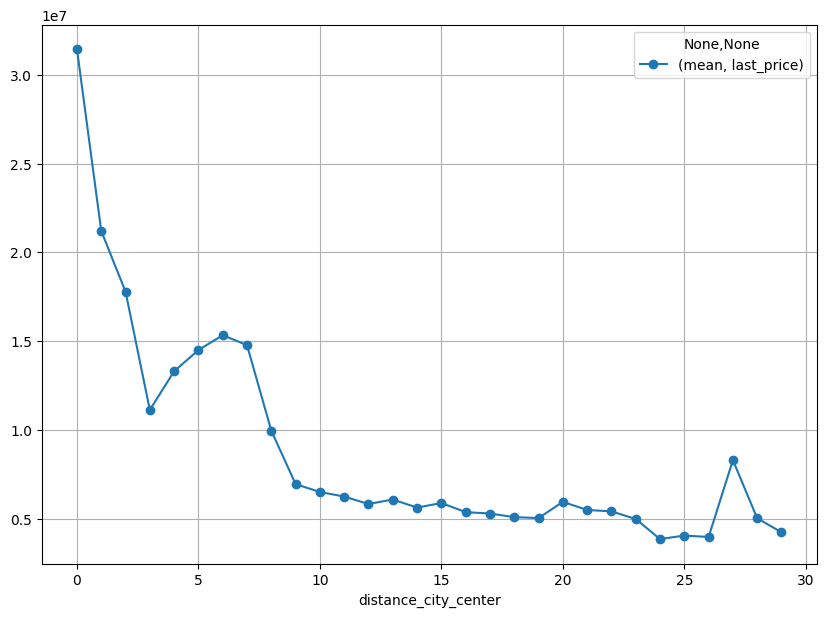

In [64]:
city_center.plot(figsize=(10, 7), style='o-', grid=True)

Вывод: По графику видно что самые дорогие квартиры в центре. До 4 км стоимость снижается, а после снова начинаем не значительно возрастает, с 9 км стоимость не зависит от удаления от центра.

In [65]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,area,price_square_meter,day_publication,month_publication,year_publication,type_floor,distance_city_center
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2,755.0,NaN,True,120370.37,3,3,2019,другой,16
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,0,NaN,81.0,True,82920.79,1,12,2018,первый,19
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,2,574.0,558.0,True,92785.71,3,8,2015,другой,14
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,45.0,9,False,...,3,234.0,424.0,True,408176.10,4,7,2015,другой,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1,48.0,121.0,True,100000.00,1,6,2018,другой,8


### Общий вывод

В ходе исследования данных о продаже квартир были выполнены следующие этапы и выводы:
1. В данных имеется 23699 записи. В ряду столбцов есть пропущенные данные.
2. В процессе предобработки данных:
 * Переименовали столбец cityCenters_nearest на city_centers_nearest;
 * Заполнили явные пропуски;
 * Изменили тип данных в соответствии с данными в столбцах;
 * В столбце locality_name устранены неявные дубликаты;
 * Сделали выводы:
    - Человеческий фактор;
    - Возможны программные сбои;
    - Возможно во время работы добавлялись данные, ранее введенные данные не откорректировали.
3. В таблицу были добавлены новые столбцы:
 * price_square_meter - цена квадратного метра с точностью до двух знаков после запятой;
 * day_publication - день недели публикации объявления (0 - понедельник, 1 - вторник, и т.д.);
 * month_publication - месяц публикации объявления;
 * year_publication - год публикации объявления;
 * type_floor - тип этажа квартиры (значения - "первый", "последний", "другой")
 * distance_city_center - расстояние до центра города в км.
4. Проведен исследовательнский анализ:
 * Изучены и описаны параметры: 
    - среднестатистическое предложение, это квратира в пятиэтажном доме средней площадью 52 кв.м, площадью кухни 6 кв.м, высотой потолков 2,65 м, находиться меджу первым и помледним этажем, расстояние до центра города 5 км или 13 км
 * Изучено, как быстро продавались квартиры: 
    - среднее значение по времени продажи квартиры - 180 дней, медианное - 95 дней. Медианное значение более точно характеризует среднее время продажи, потому что не зависит от выбросов;
    - Быстрыми продажами можно считать продажи за 45 дней (1 квартиль), долгими - больше 232 дней (3 квартиль).
 * Определили какие факторы влияют на общую стоимость квартиры:
    - Чем больше площадь, тем выше стоимость;
    - Чем больше жилая площадь, тем выше стоимость, но зависимость ниже;
    - На первом этаже стоимость квартиры значительно ниже, чем на остальных этажах. Дороже стоимость квартир на других этажах, самые дорогие квартиры на последнем этаже.
 * Посчитали среднюю цену одного квадратного метра в 10 населенных пунктах с наибольшим числом публикаций:
    - Наибольшая стоимость квадратного метра в Санкт-Петербурге, затем идет Пушкин, вероятно из-за большого количества парков. затем следуют населенные пункты непосредственно прилегающие к Санкт-Петербургу. Самая низкая стоимость из десяти населенных пунктов в Выборге.
 * Вычислили среднюю стоимость квартир на разном удалении от центра Санкт-Петербурга:
    - Самые дорогие квартиры в центре города, стоимость уменьшается до 4 км, а после снова начинаем не значительно возрастает, с 9 км стоимость не зависит от удаления от центра.